In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# 나이 결측치는 평균으로 대체
df['Age'].fillna( df['Age'].mean(), inplace=True )

C:\Users\M\AppData\Local\Temp\ipykernel_15696\891204199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna( df['Age'].mean(), inplace=True )


In [13]:
# Cabin은 삭제
df.drop(columns='Cabin', inplace=True)

In [15]:
# Embarked는 최빈값
df['Embarked'] = df['Embarked'].fillna( df['Embarked'].mode()[0])

In [16]:
df.isna().sum().sum()

np.int64(0)

In [19]:
# 성별 생존률
df.groupby('Sex')['Survived'].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [20]:
# 좌석등급에 따른 생존률
df.groupby('Pclass')['Survived'].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [21]:
# 항구별 생존률
df.groupby('Embarked')['Survived'].mean() * 100

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

In [24]:
data = df[ (df['Sex']=='female') & (df['Survived']==1) ]
data['Age'].describe()

count    233.000000
mean      28.979263
std       13.032597
min        0.750000
25%       22.000000
50%       29.699118
75%       35.000000
max       63.000000
Name: Age, dtype: float64

In [25]:
# 성별과 좌석등급 생존자
df.pivot_table(
  index='Sex', columns='Pclass', values='Survived', aggfunc='sum'
)

Pclass,1,2,3
Sex,,,
female,91,70,72
male,45,17,47


In [26]:
df.pivot_table(
  index='Sex', columns='Embarked', values='Survived', aggfunc='sum'
)

Embarked,C,Q,S
Sex,,,
female,64,27,142
male,29,3,77


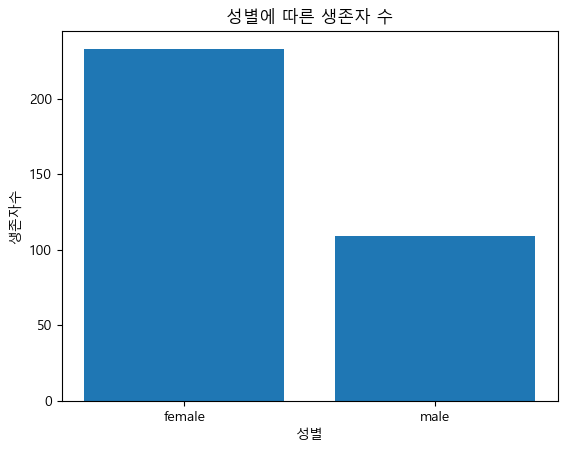

In [29]:
s1 = df[ df['Survived'] == 1 ]['Sex'].value_counts()

fig, ax = plt.subplots()
ax.bar(s1.index, s1.values)
ax.set_title('성별에 따른 생존자 수')
ax.set_xlabel('성별')
ax.set_ylabel('생존자수')
plt.show()

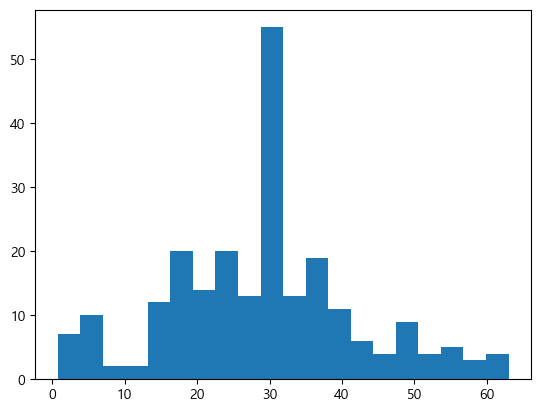

In [33]:
# 여성 생존자 나이 분포
data = df[ (df['Sex']=='female') & (df['Survived']==1) ]['Age']

fig, ax = plt.subplots()
ax.hist(data, bins=20)

plt.show()


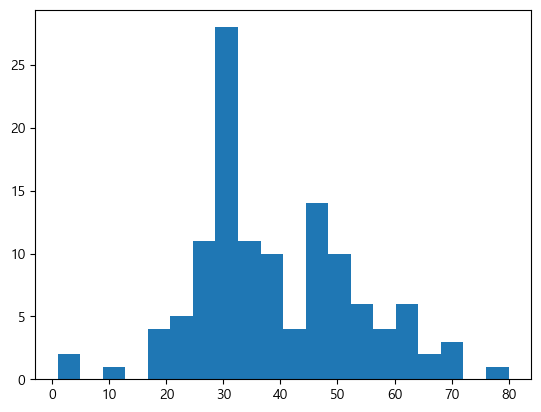

In [35]:
# 남성 승객 중 1등석 탑승자의 나이 분포
data = df[ (df['Sex']=='male') & ( df['Pclass']==1) ]['Age']

fig, ax = plt.subplots()
ax.hist(data, bins=20)

plt.show()

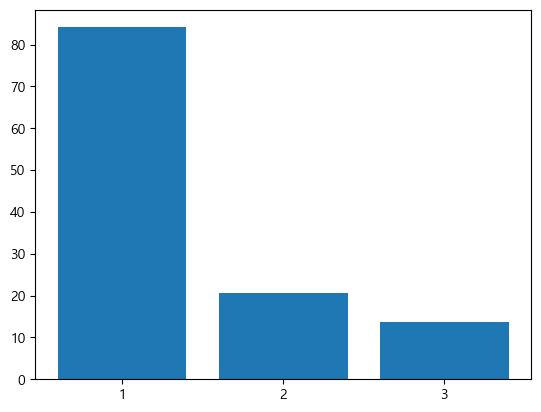

In [38]:
# 좌석등급에 따른 평균 운임요금 시각화
data = df.groupby('Pclass')['Fare'].mean()

fig, ax = plt.subplots()
ax.bar(data.index, data.values)
ax.set_xticks([1,2,3])
plt.show()

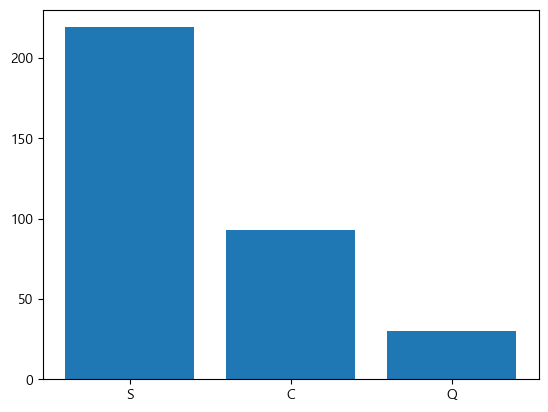

In [41]:
# 항구별 생존자 수 시각화
data = df[ df['Survived']==1 ]['Embarked'].value_counts()

fig, ax = plt.subplots()
ax.bar(data.index, data.values)

plt.show()